# KNN
- Supervised Learning 알고리즘의 일종

In [1]:
from IPython.display import display
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

## k-Neighbors Classification
- 투표와 유사
- 이웃의 개수는 되도록 홀수로 선택하는 게 좋음

### n_neighbors=1 : 이웃이 하나인 경우

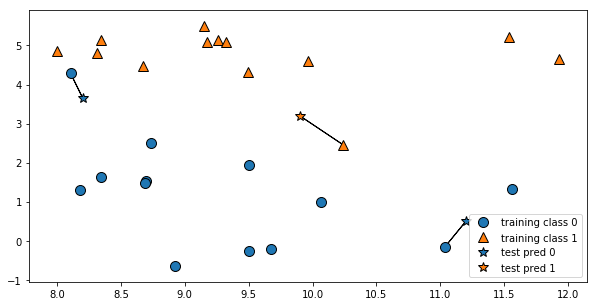

In [2]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=1)

###  n_neighbors=3 : 이웃이 셋인 경우

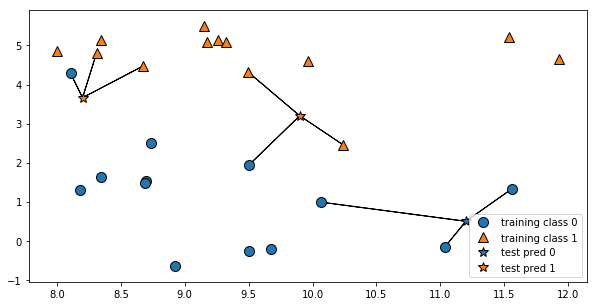

In [3]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape: {}".format(X_train.shape)) # 훈련 데이터셋
print("y_train shape: {}".format(y_train.shape)) # 훈련 데이터셋의 라벨 데이터셋

print()

print("X_test shape: {}".format(X_test.shape)) # 테스트 데이터셋
print("y_test shape: {}".format(y_test.shape)) # 테스트 데이터셋의 라벨 데이터셋

X_train shape: (19, 2)
y_train shape: (19,)

X_test shape: (7, 2)
y_test shape: (7,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # 이웃이 셋인 경우
clf.fit(X_train, y_train)
print("prediction result: ",clf.predict(X_test)) # 테스트 데이터셋을 이용하여 예측치 산출
print("accuracy: ",clf.score(X_test, y_test)) # 정확도 측정

predicted result:  [1 0 1 0 1 0 0]
accuracy:  0.8571428571428571


### 결정 경계(decision boundary)

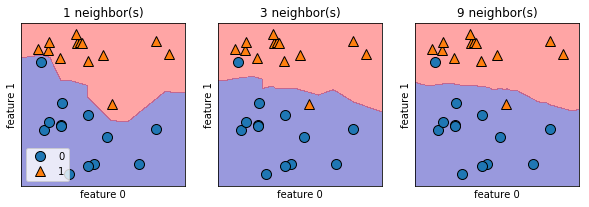

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

- 이웃의 개수가 모델의 복잡도를 결정한다.
- 이웃이 늘어날수록 결정 경계가 부드러워진다. --> 단순한 모델임을 의미
- 이웃 하나만을 고려할 땐 지나치게 과적합된 것으로 이해할 수 있다.

### k-Neighbors Classification에서 적절한 이웃의 갯수 결정하기

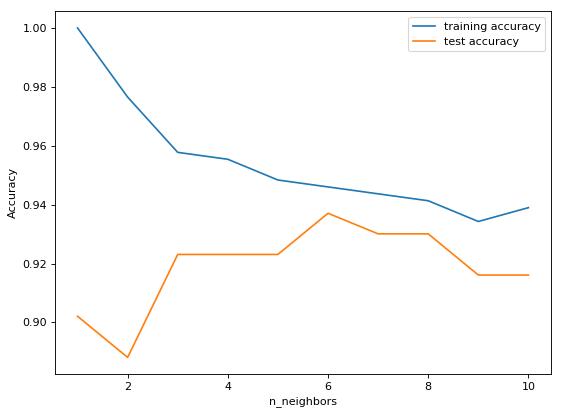

In [14]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target, 
    
    stratify=cancer.target, 
    # stratify: cancer.target데이터의 비율을 살펴서 split해줌으로써 지나치게 특정 라벨의 데이터만 들어가는 것을 사전에 방지한다.
    
    random_state=66
)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) # 훈련 데이터에 대한 Accuracy
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test)) # 테스트 데이터에 대한 Accuracy

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- test accuracy의 결과, 이웃의 개수는 6일 경우가 적합함
- 훈련 데이터셋에 대해서 정확도가 점점 낮아지는데, 이는 고려하고자 하는 이웃의 개수가 늘어날수록 정확도가 낮아진다는 것을 의미한다.

## k-Neighbors Regression

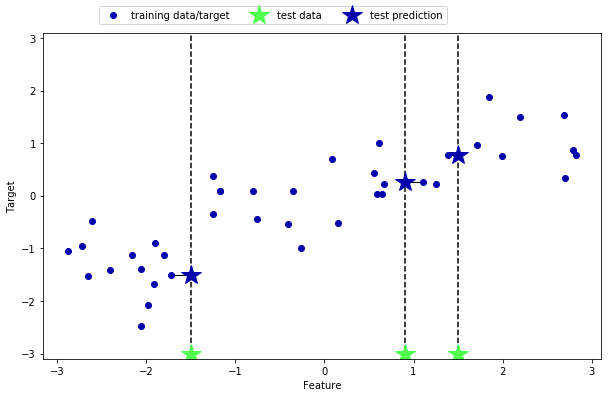

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

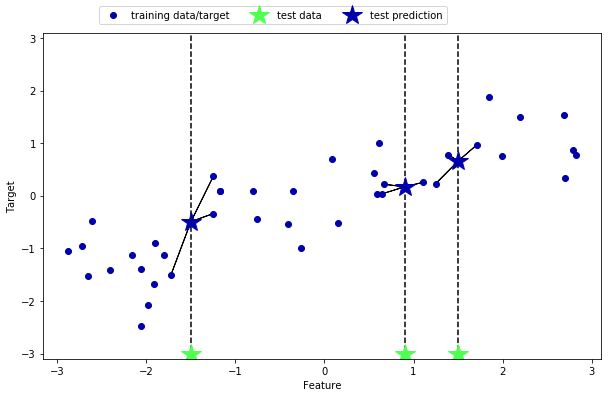

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3) # 세 이웃이 가진 값의 산술평균 값을 갖는다.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("prediction result: ", reg.predict(X_test))
print()
print("Test set R^2 accuracy: ", reg.score(X_test, y_test))

prediction result:  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]

Test set R^2 accuracy:  0.8344172446249604


- 회귀에서는 R^2값이 정확도의 결과로 반환됨(결정 계수라고 부름)
- 0과 1사이의 값(확률)

### k-Neighbors Regression에서 적절한 이웃의 갯수 결정하기

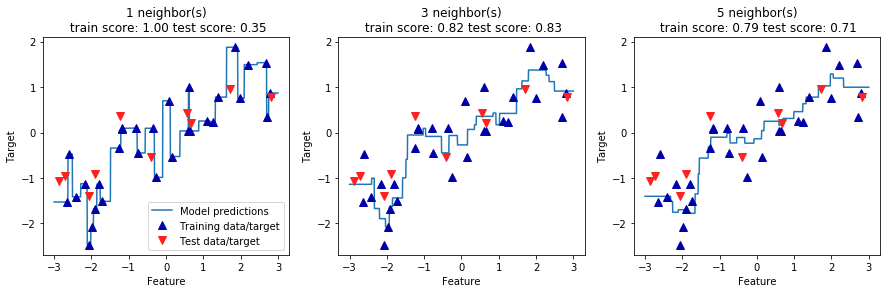

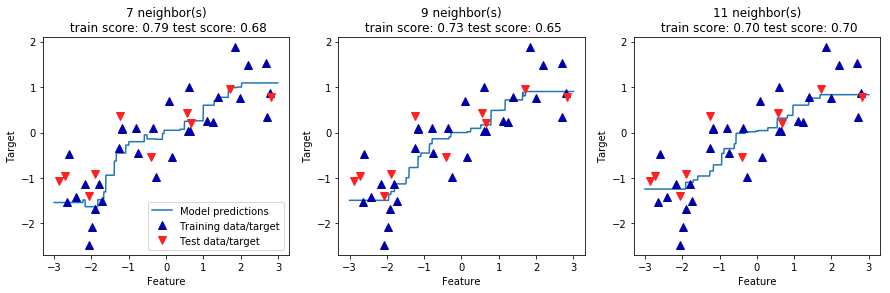

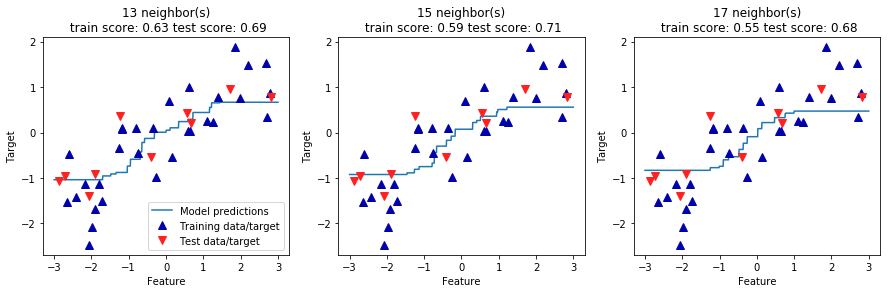

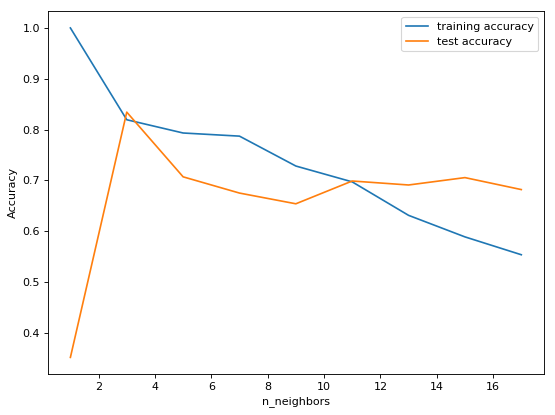

In [24]:
np.linspace(-3, 3, 1000).reshape(-1, 1).shape

training_accuracy_2 = []
test_accuracy_2 = []

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # transpose 시킴
for n_neighbors, ax in zip([1, 3, 5], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    training_accuracy_2.append(reg.score(X_train, y_train))
    test_accuracy_2.append(reg.score(X_test, y_test))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # transpose 시킴
for n_neighbors, ax in zip([7, 9, 11], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    training_accuracy_2.append(reg.score(X_train, y_train))
    test_accuracy_2.append(reg.score(X_test, y_test))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # transpose 시킴
for n_neighbors, ax in zip([13, 15, 17], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, 
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    training_accuracy_2.append(reg.score(X_train, y_train))
    test_accuracy_2.append(reg.score(X_test, y_test))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

neighbors_settings = range(1, 18, 2)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(neighbors_settings, training_accuracy_2, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy_2, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- k=3일 때 정확도가 가장 높으므로 적합한 이웃의 개수는 3이다.

### KNN 알고리즘의 장단점
- 장점
  - 더 복잡한 알고리즘을 적용해 보기 전에 시도해 볼만함

- 단점
  - 데이터셋이 많을 때, 성능이 좋지 않음
  - 수백개 이상의 다양한 특성을 지닌 데이터셋에 대해서 성능이 좋지 않음
  - 특성값 대부분이 0인 희소 데이터셋에 대해 성능이 좋지 않음
  - 데이터 전처리 작업이 중요
    - 거리를 계산할 때마다 값의 범위가 다를 경우 영향을 크게 받기 때문에, 정규화 작업이 필수적으로 필요함